# Embed a trivial 3 dimensional dataset to 2 dimensions

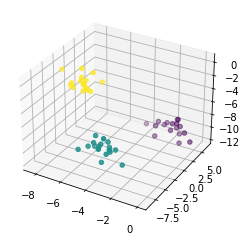

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=3, n_features=3, random_state=1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

plt.show()

Epoch 1/5
2450/2450 [==============================] - 2s 769us/step
Total loss: 9055.7783203125
Epoch 2/5
2450/2450 [==============================] - 2s 790us/step
Total loss: 1167.24072265625
Epoch 3/5
2450/2450 [==============================] - 2s 807us/step
Total loss: 825.8538208007812
Epoch 4/5
2450/2450 [==============================] - 2s 798us/step
Total loss: 713.63330078125
Epoch 5/5
2450/2450 [==============================] - 2s 761us/step
Total loss: 641.6376342773438


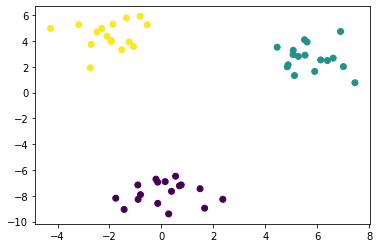

In [2]:
from saepipe import EmbeddingPipeline
from numpy.linalg import norm
from tensorflow.keras.layers import Dense

difference = lambda a, b: norm(a - b)

pipeline = EmbeddingPipeline()
pipeline.add(Dense(2))

pipeline.compile(optimizer='adam', loss='mean_squared_error')
pipeline.fit(difference, X, epochs=5)

X_embed = pipeline.predict(X)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_embed[:, 0], X_embed[:, 1], c=y)

plt.show()